<a href="https://colab.research.google.com/github/AnandNimmalapudi/OPSC/blob/main/objectdectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import cv2
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [23]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5
config_path = "/content/yolov3.cfg"
weights = "/content/yolov3.weights"
labels = open("/content/coco.names").read().strip().split("\n")
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [25]:
net = cv2.dnn.readNetFromDarknet(config_path, weights)

In [32]:
def model_output(path_name):
    image = cv2.imread(path_name)
    file_name = os.path.basename(path_name)
    filename, ext = file_name.split(".")
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    ln = net.getLayerNames()
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
    layer_outputs = net.forward(ln)
    boxes, confidences, class_ids = [], [], []
    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > CONFIDENCE:
                box = detection[0:4] * np.array([w, h, w, h])
                (centerX, centerY, width, height) = box.astype("int")
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    return boxes, confidences, class_ids




In [33]:
def detection_recognition(path_name):
    image = cv2.imread(path_name)
    boxes, confidences, class_ids = model_output(path_name)
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)
    font_scale = 1
    thickness = 1
    if len(idxs)>0:
        for i in idxs.flatten():
            x,y = boxes[i][0], boxes[i][1]
            w,h = boxes[i][2], boxes[i][3]
            color = [int(c) for c in colors[class_ids[i]]]
            cv2.rectangle(image, (x,y), (x+w, y+h), color = color, thickness= thickness)
            text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
            (text_width, text_height) = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
            text_offset_x = x
            text_offset_y = y - 5
            box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height))
            overlay = image.copy()
            cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color, thickness=cv2.FILLED)
            image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)#add two copies to one and the numbers define blending percent
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=font_scale, color=(0, 0, 0), thickness=thickness)
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

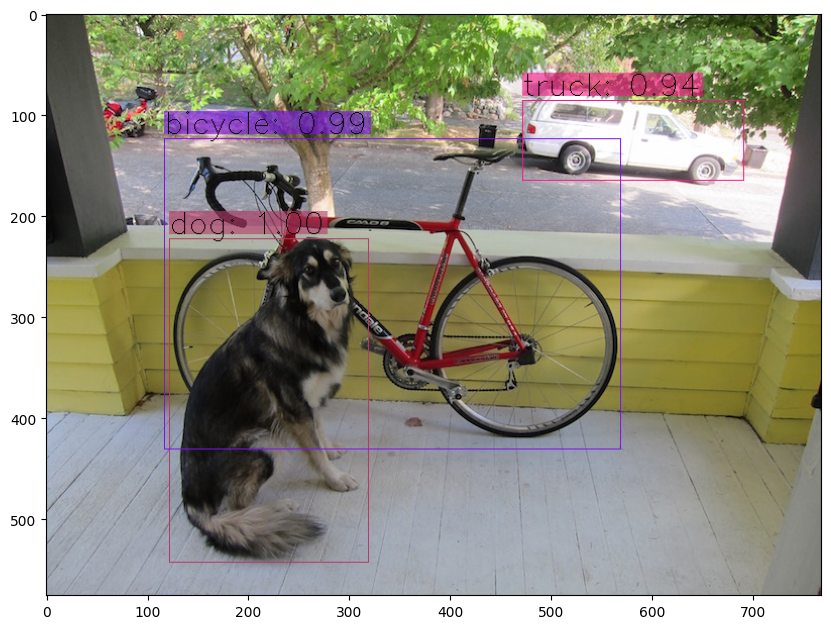

In [35]:
detection_recognition("/content/dog.jpg")


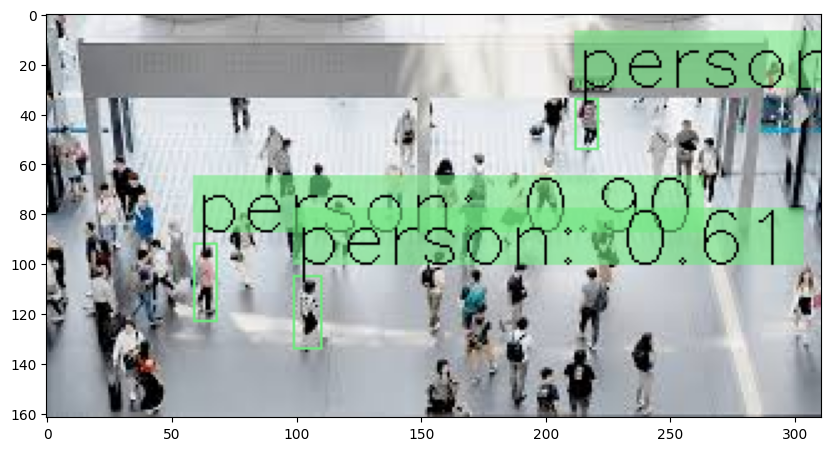

In [36]:
detection_recognition("/content/images.jpeg")


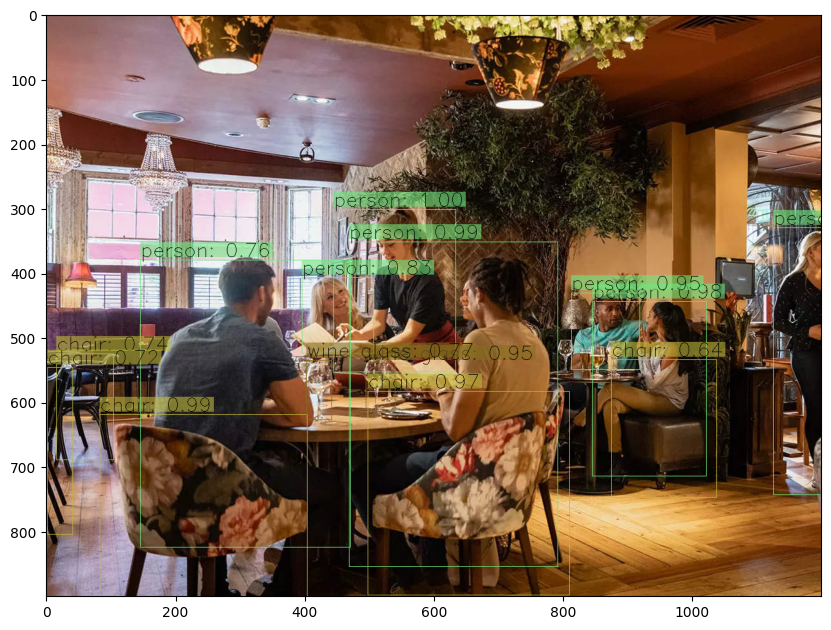

In [37]:
detection_recognition("/content/mg.jpg")
